In [1]:
import numpy as np
import pandas as pd

column_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(
    '/Users/navikanshkaushik/Desktop/Codes/Research Paper Implementations/Matrix Factorization in Reccomender Systems/ml-100k/u.data',
    sep='\t',
    names=column_names)

In [2]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
user_ids = ratings['user_id'].unique()
user_ids.sort()
movie_ids = ratings['movie_id'].unique()
movie_ids.sort()


In [4]:
print(f'Number of users: {len(user_ids)}')
print(f'Number of movies: {len(movie_ids)}')

Number of users: 943
Number of movies: 1682


In [5]:
num_users = len(user_ids)
num_movies = len(movie_ids)
ratings_matrix = np.zeros((num_users, num_movies))

for row in ratings.itertuples():
    user_index = np.where(user_ids == row.user_id)[0][0]
    movie_index = np.where(movie_ids == row.movie_id)[0][0]
    ratings_matrix[user_index, movie_index] = row.rating

In [6]:
print(ratings_matrix.shape)
print(ratings_matrix)
print(f'Number of ratings: {np.count_nonzero(ratings_matrix)}')
print(f'Number of missing ratings: {np.count_nonzero(ratings_matrix == 0)}')

(943, 1682)
[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
Number of ratings: 100000
Number of missing ratings: 1486126


In [7]:
import support

In [8]:
P, Q, rmse = support.Matrix_factorization(ratings_matrix)
print(f'P shape: {P.shape}')
print(f'Q shape: {Q.shape}')

Step 50/100, Loss: 61672.0801
Step 100/100, Loss: 59090.7512
P shape: (943, 20)
Q shape: (20, 1682)


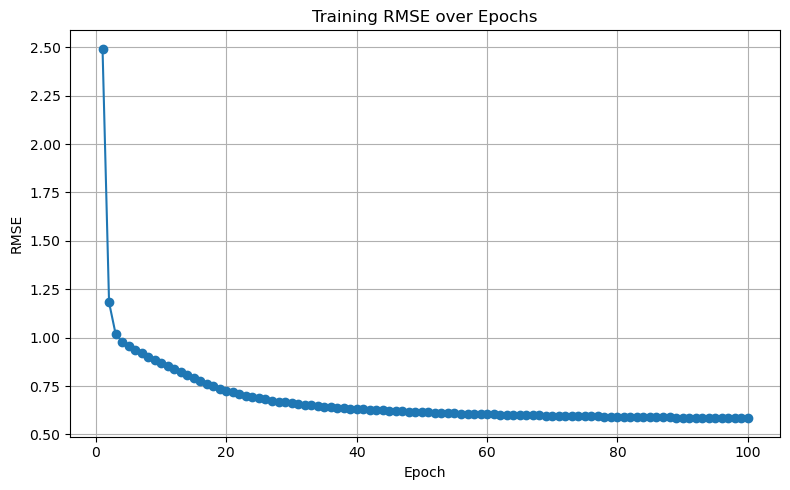

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), rmse, marker='o')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training RMSE over Epochs')
plt.grid(True)
plt.tight_layout()
plt.show()
# print(f'RMSE: {rmse}')